<a href="https://colab.research.google.com/github/eunzzae/KaggleStudy_MustHave/blob/main/Chap07_%EB%B2%94%EC%A3%BC%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 경진대회 이해
캐글 데이터 : https://www.kaggle.com/competitions/cat-in-the-dat





## 1-1) 데이터 설명
* <목적> 다양한 인코딩 전략을 탐구하는 것  
1) 누락 값이 없음  
2) 특징을 가진 값이 포함되어 있지 않아 데이터 단순화   

* <피쳐> 맥락이 없어 의미는 알 수 없음
bin_* : 이진 피처  
nom_* : 명목형 데이터  
ord_* : 순서형 데이터  

* <예측> 0, 1 이진 열의 확률을 예측함



# 2. 탐색적 데이터 분석


## 2-1) 데이터 둘러보기

In [44]:
import warnings

warnings.filterwarnings(action='ignore')

In [45]:
import pandas as pd

data_path = '/content/drive/MyDrive/[캐글] 스터디_musthave/data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

train #300000 * 24col
test #200000*23col

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [46]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [47]:
def resumetable(df):
  print(f'데이터 세트 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['임의값'] = df.loc[0].values

  # 고윳값 한번에 출력하기
  unique_feature = []
  for i in range(len(df.columns)):
    feature = train.columns[i]
    unique_feature.append(train[feature].unique())
  summary['고윳값'] = unique_feature

  return summary

resumetable(train)

데이터 세트 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,임의값,고윳값
0,bin_0,int64,0,2,0,"[0, 1]"
1,bin_1,int64,0,2,0,"[0, 1]"
2,bin_2,int64,0,2,0,"[0, 1]"
3,bin_3,object,0,2,T,"[T, F]"
4,bin_4,object,0,2,Y,"[Y, N]"
5,nom_0,object,0,3,Green,"[Green, Blue, Red]"
6,nom_1,object,0,6,Triangle,"[Triangle, Trapezoid, Polygon, Square, Star, C..."
7,nom_2,object,0,6,Snake,"[Snake, Hamster, Lion, Cat, Dog, Axolotl]"
8,nom_3,object,0,6,Finland,"[Finland, Russia, Canada, Costa Rica, China, I..."
9,nom_4,object,0,4,Bassoon,"[Bassoon, Piano, Theremin, Oboe]"


In [48]:
# 순서형 피처 확인
for i in range(6):
  feature = 'ord_' + str(i)
  print(f'{feature} : {train[feature].unique()}')

ord_0 : [2 1 3]
ord_1 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 

## 2-2) 데이터 시각화  

In [49]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.5, 1.0, 'Target Distribution')]

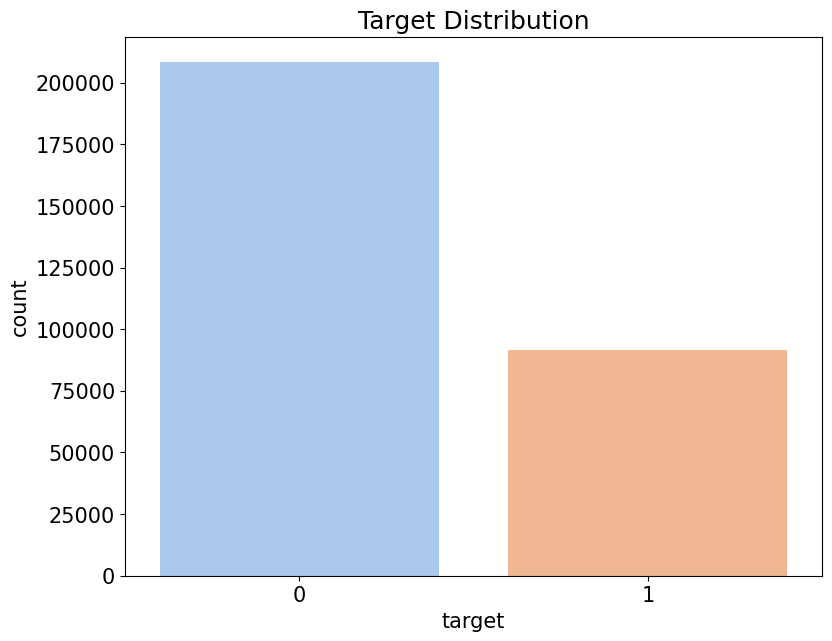

In [50]:
sns.set_palette('pastel')
mpl.rc('font', size=15) # 폰트크기 설정
fig = plt.figure(figsize=(9,7)) # Figure 크기 설정

# 타깃값 분포(이진) 카운트플롯
fig = sns.countplot(train, x='target')
fig.set(title='Target Distribution')

### ✅ ax.patches 사용법
* ax축을 구성하는 그래프 도형 객체 모두를 담은 리스트

In [9]:
rectangle = fig.patches[0] # 첫번째 rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

사각형 높이: 208236.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4
텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


In [10]:
fig.patches[0].get_x()

-0.4

Text(0.5, 1.0, 'Target Distriburion')

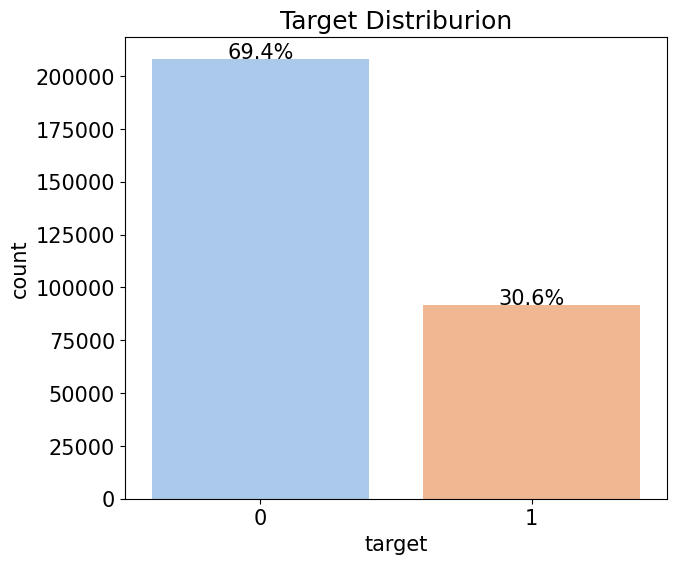

In [11]:
def write_percent(fig, total_size):
  ''' 도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''

  for patch in fig.patches:
    height=patch.get_height() # 도형 높이(데이터 개수)
    width = patch.get_width() # 도형 너비
    left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100 # 타깃값 비율

    # (x, y) 좌표에 텍스트 입력
    fig.text(x=left_coord + width/2.0,     # x축 위치
             y=height + total_size*0.001,  # y축 위치
             s=f'{percent:1.1f}%',         # 입력 텍스트
             ha='center')                  # 가운데 정렬

plt.figure(figsize=(7,6))

fig = sns.countplot(train, x='target')
write_percent(fig, len(train)) # 비율 표시
fig.set_title('Target Distriburion')

### ✅ 이진피쳐 분포

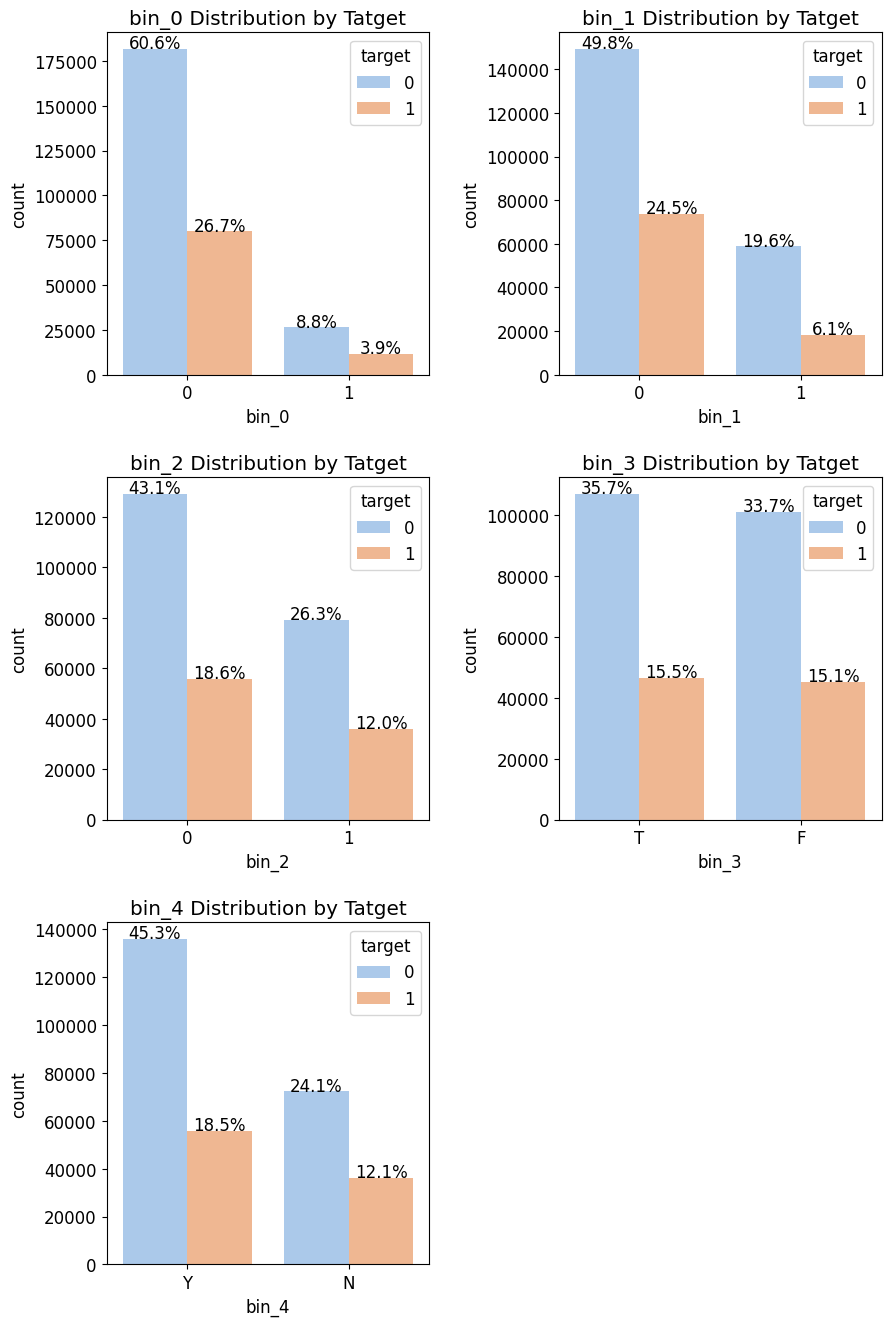

In [12]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 Figure 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features):
  fig = plt.subplot(grid[idx])

  # fig축에 타깃값 분포 카운트플롯 그리기
  sns.countplot(data=train,
                x=feature,
                hue='target',
                palette='pastel',  # 그래프 색상 설정
                ax=fig)

  fig.set_title(f'{feature} Distribution by Tatget') # 그래프 제목 설정
  write_percent(fig, len(train))                      # 비율 표시

### ✅ 명목형 피처 분포


### Step1 : 교차분석표 생성 함수 만들기

In [13]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [14]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab # 각 행의 합이 100%가 됨

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [15]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [16]:
def get_crosstab(df, feature):
  crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
  crosstab = crosstab.reset_index()
  return crosstab

crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [17]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

### Step 2 : 포인트플롯 생성함수 만들기

In [18]:
def plot_pointplot(ax, feature, crosstab, train):
  sns.countplot(data=train, x=feature, order=crosstab[feature].values, ax=ax)
  ax2 = ax.twinx()
  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values)
  ax2.set_ylabel('Target Ratio(%)')

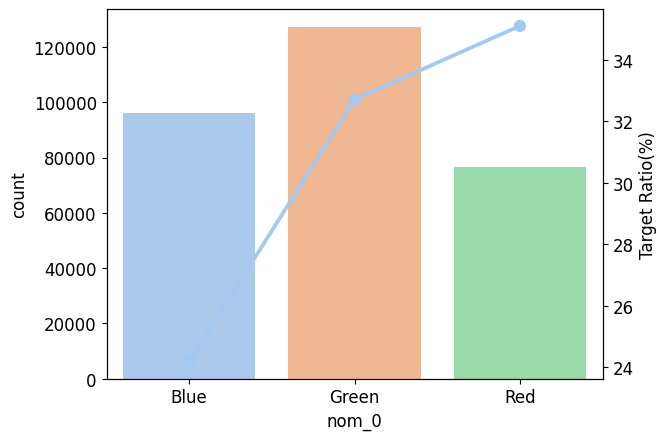

In [19]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size=12)
grid = gridspec.GridSpec(1,1)

ax = plt.subplot(grid[0])
plot_pointplot(ax, 'nom_0', get_crosstab(train, 'nom_0'), train)

### Step 3 : 피처 분포도 및 피처별 타깃값 1의 비율인 포인트플롯 생성함수 만들기

In [20]:
def plot_pointplot(ax, feature, crosstab) :
  ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
  # 새로운 축에 포인트플롯 그리기
  ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                      order=crosstab[feature].values, # 포인트플롯 순서
                      color='black')    # 포인트플롯 색상
                                       # 범례 미표시
  ax2.set_ylim(crosstab[1].min()-5 , crosstab[1].max()*1.1) # y축 범위 설정
  ax2.set_ylabel('Target 1 Ratio(%)')

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
  plt.figure(figsize=size) # 전체 Figure 크기 설정
  grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
  plt.subplots_adjust(wspace=0.45, hspace=0.3) #서브플롯 좌우/상하 여백 설정

  for idx, feature in enumerate(features) :
    ax = plt.subplot(grid[idx])
    crosstab = get_crosstab(df, feature) # 교차분석표 생성

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=df,
                 order=crosstab[feature].values,
                 color='skyblue',
                 ax=ax)

    write_percent(ax, len(df)) # 비율 표시

    plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기

    ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

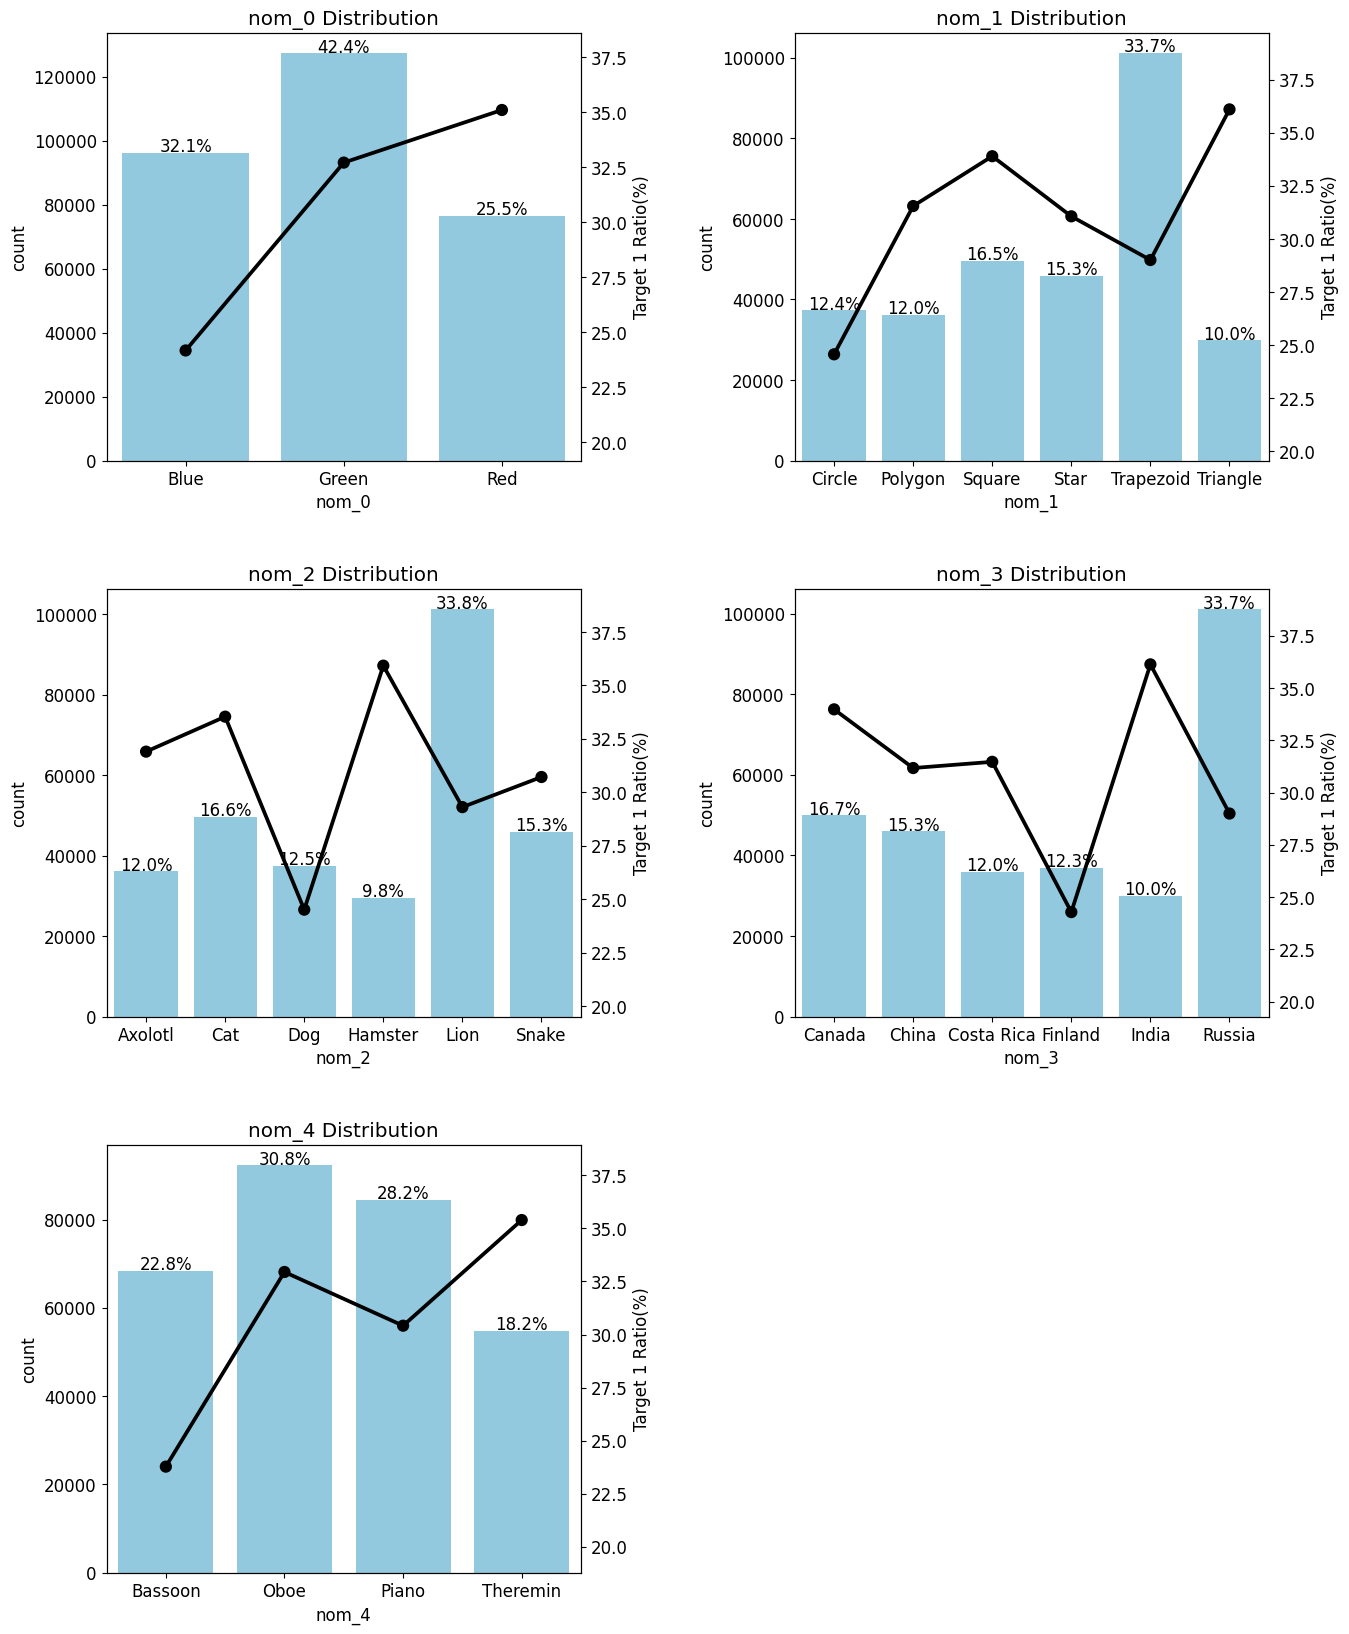

In [21]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

### ✅ 순서형 피처

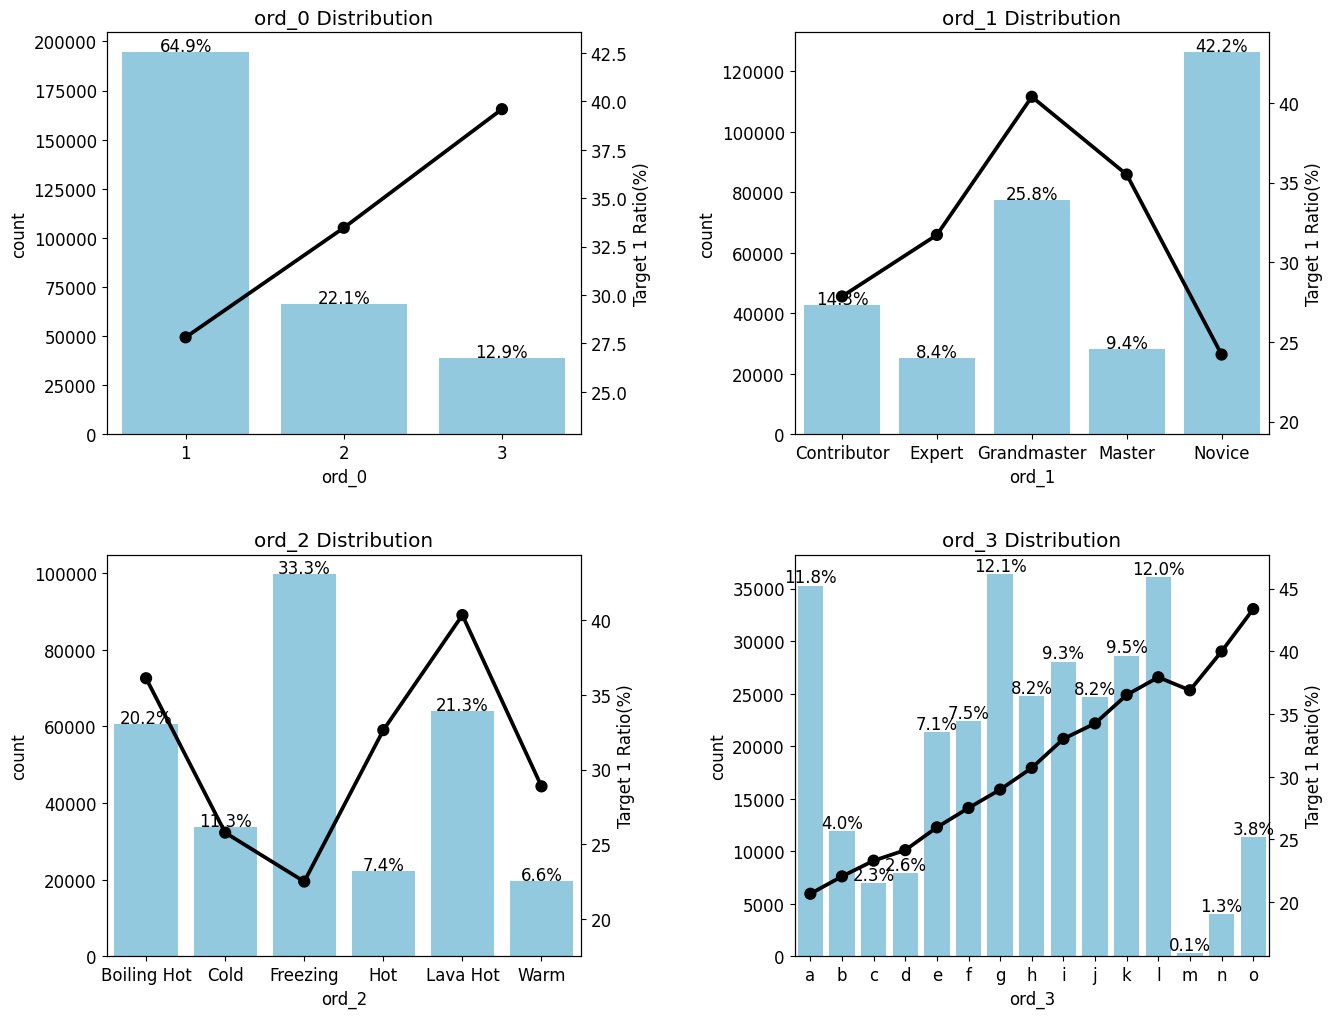

In [22]:
# 순서형 피처 분포
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size = (15,12))

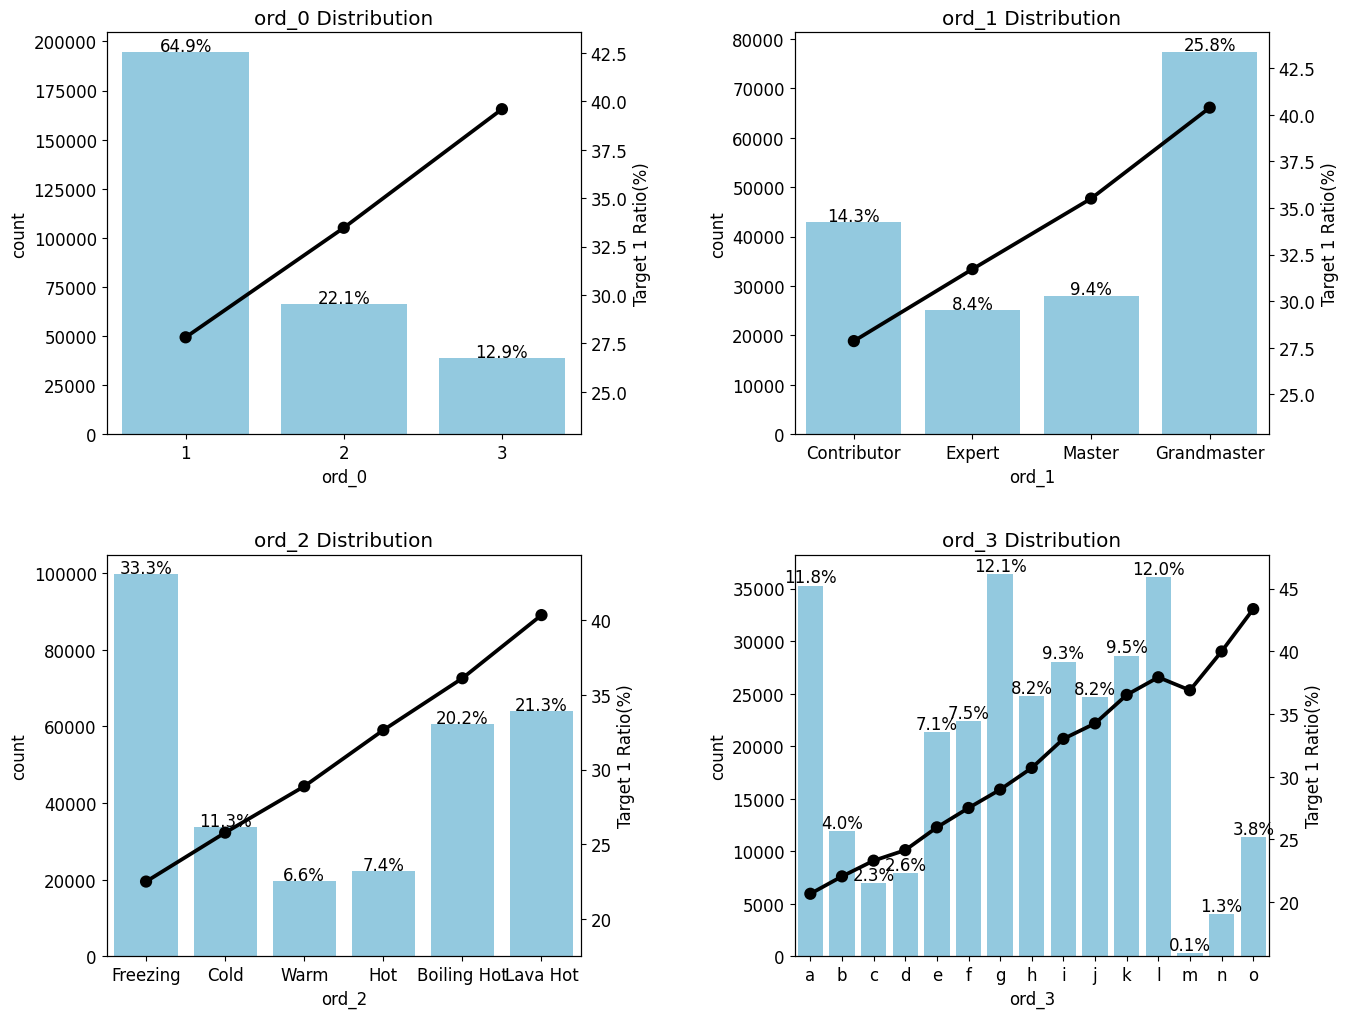

In [23]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Npvice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)
plot_cat_dist_with_true_ratio(train, ord_features,
                              num_rows=2, num_cols=2, size=(15,12))

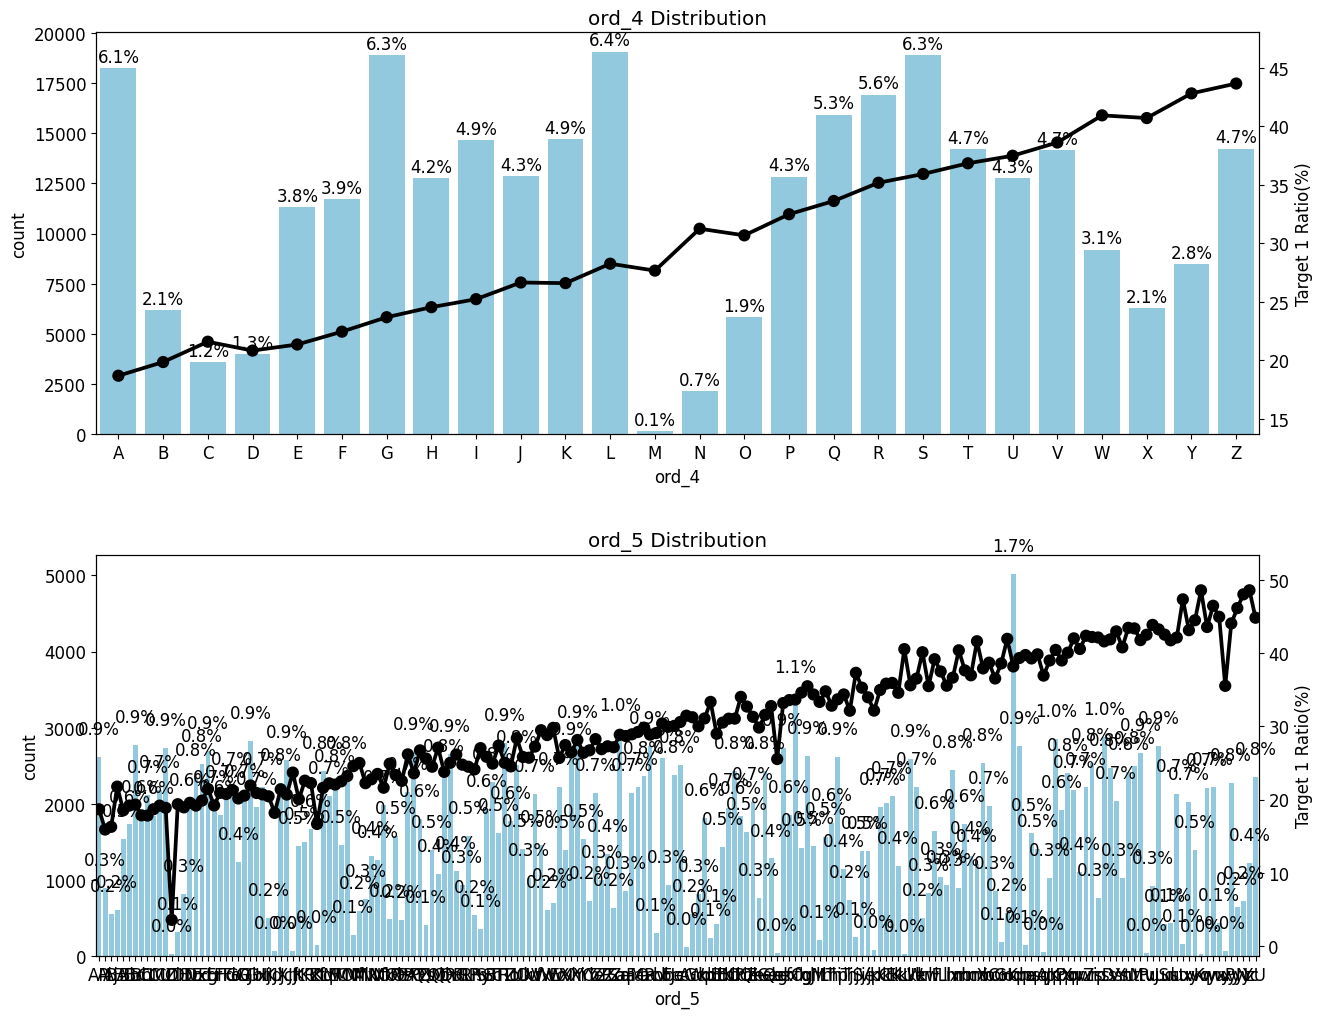

In [24]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'],
                              num_rows=2, num_cols=1, size=(15,12))

### ✅ 날짜형 피처

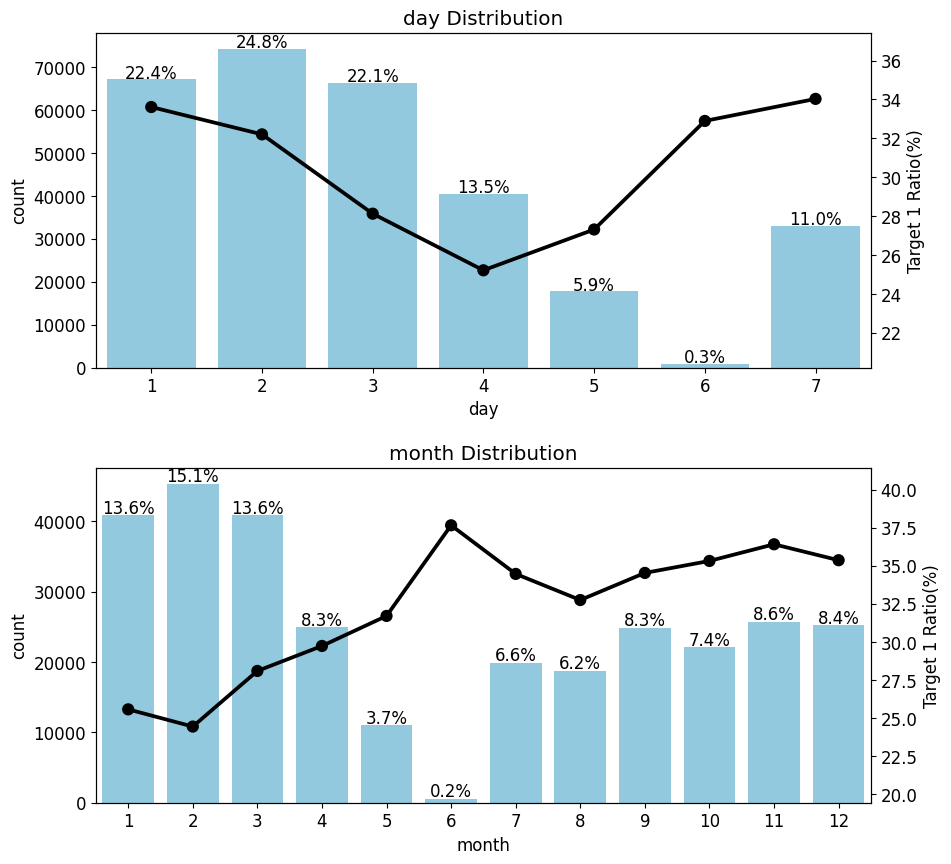

In [25]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features,
                              num_rows=2, num_cols=1, size=(10, 10))

# 3. 범주형 데이터 이진분류 경진대회 베이스라인 모델

In [26]:
import pandas as pd

data_path = '/content/drive/MyDrive/[캐글] 스터디_musthave/data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')


In [27]:
all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기
all_data = all_data.drop('target', axis=1)

## 3-1) 피쳐 엔지니어링

In [28]:
sample = all_data[:10]
display(sample.nom_0)
display(pd.get_dummies(sample.nom_0))

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() # 원-핫 인코더 생성
# fit&transform 한꺼번에

print(encoder.fit_transform(sample[['nom_0']]).toarray())
all_data_encoded = encoder.fit_transform(all_data) # 원-핫 인코딩 적용

id
0    Green
1    Green
2     Blue
3      Red
4      Red
5     Blue
6    Green
7      Red
8     Blue
9      Red
Name: nom_0, dtype: object

,Blue,Green,Red
id,,,
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,1,0,0
6,0,1,0
7,0,0,1
8,1,0,0


[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [29]:
all_data_encoded
encoder.transform(all_data)

<500000x16552 sparse matrix of type '<class 'numpy.float64'>'
	with 11500000 stored elements in Compressed Sparse Row format>

In [30]:
# 데이터 나누기
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_encoded[:num_train] # 0 ~ num_train -1행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막행

y = train['target']

from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.1,
                                                      stratify=y,
                                                      random_state=10)


## 3-2) 모델 훈련

In [31]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
logistic_model.predict_proba(X_valid)

array([[0.23273481, 0.76726519],
       [0.91407038, 0.08592962],
       [0.83036873, 0.16963127],
       ...,
       [0.24858679, 0.75141321],
       [0.49420831, 0.50579169],
       [0.95659243, 0.04340757]])

In [33]:
logistic_model.predict(X_valid)

array([1, 0, 0, ..., 1, 1, 0])

## 3-3) 모델 성능 검증

In [34]:
# 검증 데이터를 활용한 타깃 예측
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc: .4f}')

검증 데이터 ROC AUC :  0.7965


## 3-4) 예측 및 결과 제출

In [35]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(X_test)[:, 1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

# 4. 모델 성능 개선 1

In [36]:
import pandas as pd

data_path = '/content/drive/MyDrive/[캐글] 스터디_musthave/data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

### 4-1) 피쳐 엔지니어링1 : 피쳐 맞춤 인코딩

In [37]:
# 이진 피처 인코딩
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

# 순서형 피처 인코딩
ord1dict = {'Novice':0, 'Contributor':1,
            'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2,
            'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성
# ordinal 인코딩 적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
  print(feature)
  print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [38]:
# 명목형 피쳐 인코딩
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형 피처

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성

# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [39]:
all_data = all_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제


In [40]:
# 날짜 피처 인코딩
date_features = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

### 4-2) 피처 엔지니어링 2 : 피처 스케일링

In [41]:
# 순서형 피처 스케일링
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

# 인코딩 및 스케일링된 피처 합치기

all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,,,,,,
0,0,0,0,1,1,0.5,1.00,0.2,0.500000,0.12,0.712042
1,0,1,0,1,1,0.0,1.00,0.6,0.000000,0.00,0.486911
2,0,0,0,0,1,0.0,0.50,1.0,0.500000,0.68,0.162304
3,0,1,0,0,1,0.0,1.00,0.8,0.571429,0.12,0.701571
4,0,0,0,0,0,0.0,1.00,0.0,0.000000,0.68,0.827225
...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0.0,0.00,1.0,0.642857,0.00,0.130890
499996,1,0,0,0,1,0.0,0.25,1.0,0.357143,0.72,0.089005
499997,0,1,1,1,1,0.0,0.00,0.8,0.428571,0.84,0.345550


In [42]:
from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix,
                               encoded_date_matrix],
                              format='csr')

# 데이터 나누기
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0 ~ num_train - 1행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['target']

### 4-3) 하이퍼파라미터 최적화

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistci_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000],
             'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)

# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y)

KeyboardInterrupt: ignored

In [ ]:
print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)
# 최적 하이퍼파라미터 : {'C': 0.125, 'max_iter':800, 'random_state':42, 'solver':'liblinear'}

# 예측 및 결과 제출
# 타깃값 1일 확률 예측
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:, 1]

### 4-4) 예측 및 결과 제출

In [ ]:
submission['target'] = y_preds
submission.to_csv('submission.csv')

submission